<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n20.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.119270,43.387465,51.372791,-2.461958e-06,137.879524,137.879523,1.755530e-07
1,0.0,1.0,74.523557,26.009097,66.037560,-5.341903e-05,176.570161,176.570220,-5.916349e-05
2,0.0,2.0,58.049574,92.895715,82.507621,-1.176083e-07,243.452910,243.452910,-3.556673e-07
3,0.0,3.0,43.497779,44.466619,53.118103,6.490869e-06,151.082507,151.082499,7.408021e-06
4,0.0,4.0,72.085905,21.438213,63.073065,9.105071e-05,166.597273,166.597188,8.559814e-05
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,48.596864,46.811684,77.946933,-6.090742e-06,183.355475,183.355483,-8.070633e-06
59996,999.0,56.0,47.249831,77.546923,65.690961,2.781255e-07,200.487715,200.487715,4.512707e-07
59997,999.0,57.0,26.940377,89.018811,27.293754,4.731792e-07,153.252942,153.252938,3.398243e-06
59998,999.0,58.0,39.009647,35.880301,74.352683,7.412871e-06,159.242638,159.242633,5.340994e-06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.119270,43.387465,51.372791,-2.461958e-06,137.879524,137.879523,1.755530e-07
1,0.0,1.0,74.523557,26.009097,66.037560,-5.341903e-05,176.570161,176.570220,-5.916349e-05
2,0.0,2.0,58.049574,92.895715,82.507621,-1.176083e-07,243.452910,243.452910,-3.556673e-07
3,0.0,3.0,43.497779,44.466619,53.118103,6.490869e-06,151.082507,151.082499,7.408021e-06
4,0.0,4.0,72.085905,21.438213,63.073065,9.105071e-05,166.597273,166.597188,8.559814e-05
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,48.596864,46.811684,77.946933,-6.090742e-06,183.355475,183.355483,-8.070633e-06
59996,999.0,56.0,47.249831,77.546923,65.690961,2.781255e-07,200.487715,200.487715,4.512707e-07
59997,999.0,57.0,26.940377,89.018811,27.293754,4.731792e-07,153.252942,153.252938,3.398243e-06
59998,999.0,58.0,39.009647,35.880301,74.352683,7.412871e-06,159.242638,159.242633,5.340994e-06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    33.119270  43.387465  ...  137.879523  1.755530e-07
      1.0    74.523557  26.009097  ...  176.570220 -5.916349e-05
      2.0    58.049574  92.895715  ...  243.452910 -3.556673e-07
      3.0    43.497779  44.466619  ...  151.082499  7.408021e-06
      4.0    72.085905  21.438213  ...  166.597188  8.559814e-05
...                ...        ...  ...         ...           ...
999.0 55.0   48.596864  46.811684  ...  183.355483 -8.070633e-06
      56.0   47.249831  77.546923  ...  200.487715  4.512707e-07
      57.0   26.940377  89.018811  ...  153.252938  3.398243e-06
      58.0   39.009647  35.880301  ...  159.242633  5.340994e-06
      59.0   71.593365  43.136331  ...  188.291556 -5.660583e-07

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    33.119270  43.387465  ...  137.879523  1.755530e-07
      1.0    74.523557  26.009097  ...  176.570220 -5.916349e-05
      2.0    58.049574  92.895715  ...  243.452910 -3.556673e-07
      3.0    43.497779  44.466619  ...  151.082499  7.408021e-06
      4.0    72.085905  21.438213  ...  166.597188  8.559814e-05
...                ...        ...  ...         ...           ...
999.0 55.0   48.596864  46.811684  ...  183.355483 -8.070633e-06
      56.0   47.249831  77.546923  ...  200.487715  4.512707e-07
      57.0   26.940377  89.018811  ...  153.252938  3.398243e-06
      58.0   39.009647  35.880301  ...  159.242633  5.340994e-06
      59.0   71.593365  43.136331  ...  188.291556 -5.660583e-07

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.119270,43.387465,51.372791,-2.461958e-06,137.879524,137.879523,1.755530e-07
1,0.0,1.0,74.523557,26.009097,66.037560,-5.341903e-05,176.570161,176.570220,-5.916349e-05
2,0.0,2.0,58.049574,92.895715,82.507621,-1.176083e-07,243.452910,243.452910,-3.556673e-07
3,0.0,3.0,43.497779,44.466619,53.118103,6.490869e-06,151.082507,151.082499,7.408021e-06
4,0.0,4.0,72.085905,21.438213,63.073065,9.105071e-05,166.597273,166.597188,8.559814e-05
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,48.596864,46.811684,77.946933,-6.090742e-06,183.355475,183.355483,-8.070633e-06
59996,999.0,56.0,47.249831,77.546923,65.690961,2.781255e-07,200.487715,200.487715,4.512707e-07
59997,999.0,57.0,26.940377,89.018811,27.293754,4.731792e-07,153.252942,153.252938,3.398243e-06
59998,999.0,58.0,39.009647,35.880301,74.352683,7.412871e-06,159.242638,159.242633,5.340994e-06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    33.119270  43.387465  ...  137.879523  1.755530e-07
      1.0    74.523557  26.009097  ...  176.570220 -5.916349e-05
      2.0    58.049574  92.895715  ...  243.452910 -3.556673e-07
      3.0    43.497779  44.466619  ...  151.082499  7.408021e-06
      4.0    72.085905  21.438213  ...  166.597188  8.559814e-05
...                ...        ...  ...         ...           ...
999.0 55.0   48.596864  46.811684  ...  183.355483 -8.070633e-06
      56.0   47.249831  77.546923  ...  200.487715  4.512707e-07
      57.0   26.940377  89.018811  ...  153.252938  3.398243e-06
      58.0   39.009647  35.880301  ...  159.242633  5.340994e-06
      59.0   71.593365  43.136331  ...  188.291556 -5.660583e-07

[60000 rows x 7 columns]

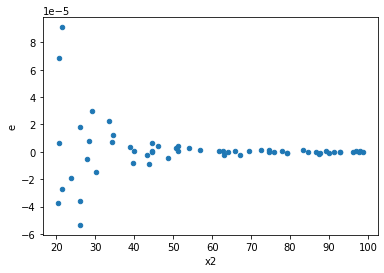

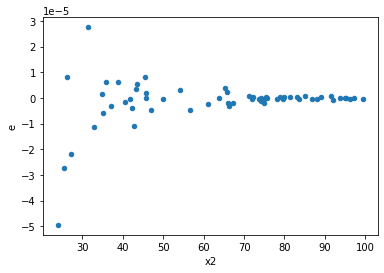

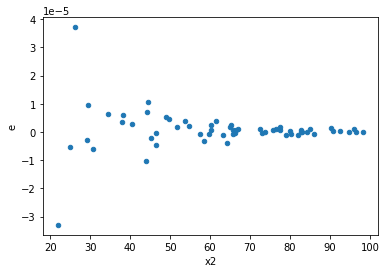

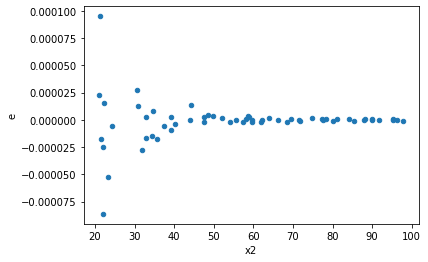

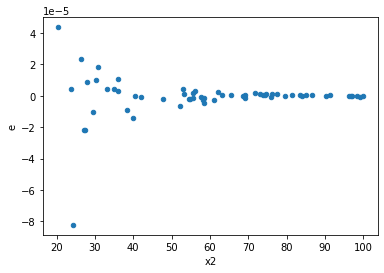

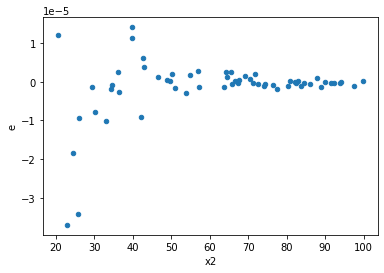

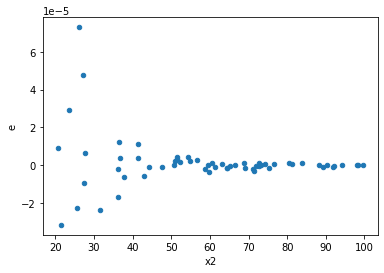

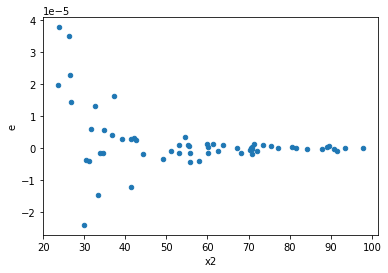

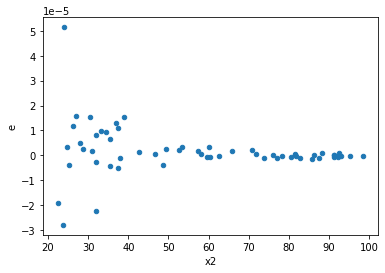

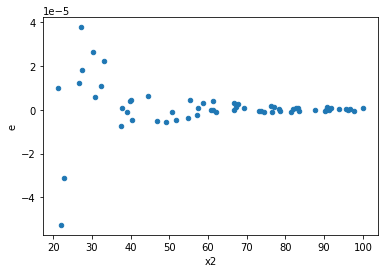

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1.786036054490751e-11,2.0113333512571777e-08,8.930180272453755e-13,1.0056666756285889e-09,0.0008879860980649453,3.2223000406845786e-27,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,6.4358755883469006e-12,4.012039823679223e-09,3.2179377941734505e-13,2.0060199118396115e-10,0.0016041405048778678,1.5812148482368807e-24,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,1.1993744061468187e-11,2.6983388803254277e-09,5.996872030734094e-13,1.349169440162714e-10,0.004444862040464579,6.650872523946214e-20,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,1.6193460248124704e-11,2.341659334222554e-08,8.096730124062352e-13,1.170829667111277e-09,0.0006915378343665449,2.3420875618511017e-28,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,8.973153907483316e-12,1.1161972416377143e-08,4.486576953741658e-13,5.580986208188571e-10,0.0008039039672161944,1.1356501501714525e-27,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,1.3964154409734478e-11,2.650848365009792e-09,6.982077204867239e-13,1.325424182504896e-10,0.005267805806645185,3.8963828499124933e-19,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,2.196417498180658e-11,9.9676800022611e-09,1.098208749090329e-12,4.98384000113055e-10,0.0022035393368190145,4.3826113210802556e-23,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,1.2678056768220695e-11,3.120535261698715e-09,6.339028384110347e-13,1.5602676308493576e-10,0.004062782729562615,2.60724384190615e-20,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,1.3955429067330761e-11,5.239271559813691e-09,6.97771453366538e-13,2.6196357799068453e-10,0.0026636201059650776,3.181282432489014e-22,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64